## Notebook objectives

Answer Business Questions and furhter hypothesis

## Agenda

[Business Context](#Business-Context)<br> 
&emsp;[Business Questions](#Business-Questions)<br>
&emsp;[Hypothesis](#Hypothesis)<br>
[Dashboard KPIs](#Dashboard-KPIs)<br>

[Imports](#Imports)<br>
&emsp;[Helper Functions and Classes](#Helper-Functions-and-Classes)<br>


[Settings](#Settings)<br>

[Loading Data](#Loading-Data)<br>
&emsp;[df_payments](#df_payments)<br>
&emsp;[df_products](#df_products)<br>
&emsp;[df_order_items](#df_order_items)<br>
&emsp;[df_geolocations](#df_geolocations)<br>
&emsp;[df_customers](#df_customers)<br>


[Analytical Base Table](#Analytical-Base-Table)<br>
&emsp;[ABT Metadata](#ABT-Metadata)<br>
&emsp;[df_orders_abt](#df_orders_abt)<br>


[Business Answers](#Business-Answers)<br>
&emsp;[How is the revenue growth and what's the growth rate?](#How-is-the-revenue-growth-and-what's-the-growth-rate?)<br>
&emsp;[How many orders do we receive each month?](#How-many-orders-do-we-receive-each-month?)<br>
&emsp;[Has the conversion rate been increasing in recent years?](#Has-the-conversion-rate-been-increasing-in-recent-years?)<br>
&emsp;[What is our repurchase rate and how many new customers have we received?](#What-is-our-repurchase-rate-and-how-many-new-customers-have-we-received?)<br>
&emsp;&emsp;[Repurchase Rate](#Repurchase-Rate)<br>
&emsp;[How often do our customers make a purchase and what is the average amount spent on each purchase?](#How-often-do-our-customers-make-a-purchase-and-what-is-the-average-amount-spent-on-each-purchase?)<br>
&emsp;[Customer purchase Frequency](#Customer-purchase-Frequency)<br>
&emsp;[What is our current churn rate (customers who haven't purchased for more than 90 days)?](#What-is-our-current-churn-rate-(customers-who-haven't-purchased-for-more-than-90-days)?)<br>

[Hypothesis Answers](#Hypothesis-Answers)<br>

## Business Context

E-Mart is a Chinese retailer that discovered the e-commerce as a way to sell to the entire world, rather than just to the population of their home city. The company has been growing without much worries, and now It wants to start using the data collected during its 4 years of e-commerce to keep growing and make more money.


The company has been growing without much worries, and now It wants to start using the data collected during the years to keep growing and make more money.
At first, the board of directors expects:

- **A Dashboard with KPIs to track their growth.**
<br>

- **Robust Data Analysis, as well as recommendation of actions. What's the actionable based on your analysis?**
<br>

- An Analysis on geolocation, a segmentation by sales, profit and more. They want insights to help increasing revenue.
<br>

- Sales forecast for the next year, in order to enable strategic planning.



### Business Questions

    Questions asked by Managers

      How is the revenue growth and what's the growth rate?

      How many orders do we receive each month?

      Has the conversion rate been increasing in recent years?

      What is our repurchase rate and how many new customers have we received?

      How often do our customers make a purchase and what is the average amount spent on each purchase?

      What is our current churn rate (customers who haven't purchased for more than 90 days)?


## Hypothesis


- **In the [Macro View](#How-is-the-revenue-growth-and-what's-the-growth-rate?) there'is Increasing Revenue, but stable increase in number of orders. However in 2020-03 there was a great rise in sales.  Mean Order Value was high, but average profit wasn't as great as average sales. Why? Can We reproduce what happened that month?**



### Dashboard KPIs

**Revenue Growth Rate**

    How fast are We growing?


**Number of Orders**

    What is our ability to generate purchasing opportunities?
    

**Repurchase Rate**

    How many customers continue to buy?
    

**Number or New Customers**

    Tracking Customer Acquisition. Is our Marketing Strategy 
    (organic or not) working?
    

**Average Ticket**

    Average amount spent per order.
    
    
**Average Profit**

    Average profit per order.


**Profit Margin**

    It Measures The Profitability Of A Business


https://benjaminwann.com/blog/why-is-profit-margin-important-full-guide


**Possíveis métricas adicionais:**

**Receita Média por Cliente** (nos ajuda a saber quanto o churn de um cliente custa para a empresa. E nos dá um olhar financeiro sobre os padrões de compra dos clientes, quando analisada junto ao Número de Pedidos e Número de novos Clientes).

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Helper Functions and Classes

In [2]:
def get_snakecase_columns(df):
    """Sets column name to snake_case format
    
    df: pandas.DataFrame
    
    Return: map
    """
    snakecase = lambda x: str(x).lower().replace(' ', '_').replace('-', '_')
    return map(snakecase, df.columns)


def find_column(df, col_name):
    """Checks if DataFrame contains a 'column name' and returns the matched columns
    
    df: pandas.DataFrame
    col_name: column name or part of column name to search for
    
    Return: DataFrame with column names that match the col_name searched
    """
    
    df_cols = pd.DataFrame(df_orders_abt.columns, columns=['col_name'])

    return df_cols[df_cols['col_name'].str.contains('date')].reset_index(drop=True)


def fig(x=15, y=5, set_as_global=False, reset_to_default=False):
    """ Adjust size of matplotlib figure

    x: figure width.
    y: figure height.
    set_as_global: bool.
        If True, then it sets "x" and "y" axis for all subsequent plots.
    reset_to_default: bool.
        If True, then it resets the global figure size back to default.
    """
    if set_as_global:
        plt.rcParams["figure.figsize"] = (x, y)
    elif reset_to_default:
        plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    else:
        plt.figure(figsize=(x,y))

### Settings

In [3]:
pd.set_option('display.max_columns', 500)

fig(12,4, set_as_global=True)

## Loading Data

### df_orders

In [4]:
df_orders = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_orders_table.csv")
df_orders.columns = get_snakecase_columns(df_orders)

df_orders['customer_id'] = df_orders['customer_id'].apply(lambda x: x[2:-2])
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_orders['order_priority'] = df_orders['order_priority'].apply(lambda x: x[2:-2])
df_orders = df_orders.assign(postal_code=df_orders['postal_code'].apply(lambda x: int(x[2:-2])))

In [5]:
df_orders.duplicated(subset=['order_id']).sum()

0

### df_payments

In [6]:
df_payments = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_payment_table.csv")
df_payments.columns = get_snakecase_columns(df_payments)

In [7]:
df_payments.duplicated(subset=['order_id']).sum()

0

### df_products

In [15]:
df_products = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_products_table.csv")
df_products.columns = get_snakecase_columns(df_products)

In [16]:
df_products.duplicated(subset=['product_id']).sum()

0

### df_order_items

In [17]:
df_order_items = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_order_items_table.csv")
df_order_items.columns = get_snakecase_columns(df_order_items)

In [18]:
df_order_items.duplicated(subset=['order_item_id']).sum()

35

### df_geolocations

In [19]:
df_geolocations = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_geolocation_table.csv")
df_geolocations.columns = get_snakecase_columns(df_geolocations)

In [20]:
df_geolocations.duplicated(subset=['postal_code']).sum()

0

### df_customers

In [21]:
df_customers = pd.read_csv("https://raw.githubusercontent.com/pauloreisdatascience/datasets/main/e_market/e_mart_customers_table.csv")
df_customers.columns = get_snakecase_columns(df_customers)

In [22]:
df_customers.duplicated(subset=['customer_id']).sum()

0

## Analytical Base Table

### ABT Metadata

[df_orders_abt](#df_orders_abt)<br>



### df_orders_abt

In [23]:
df_orders_abt = (df_orders
         .merge(df_geolocations, how='left', on='postal_code')
         .merge(df_customers, how='left', on='customer_id')
         .merge(df_payments, how='left', on=['order_id'])
)

df_orders_abt['order_date_monthly'] = df_orders_abt['order_date'].dt.to_period("M")#.dt.to_timestamp(freq='M')
df_orders_abt['market_region'] = df_orders_abt['market'] +" | " + df_orders_abt['region']

df_orders_abt.head(2)

,order_id,customer_id,order_date,ship_date,delivery_date,ship_mode,postal_code,market,order_priority,deadline_date,order_status,region,country,state,city,customer_name,segment,sales,profit,order_date_monthly,market_region
0,AE-2011-9160-PO-8865,PO-8865,2019-03-10,2019-03-29,2019-04-01,Standard Class,5137041,EMEA,Medium,2019-04-19,Delivered,EMEA,United Arab Emirates,'Ajman,Ajman,Patrick O'Donnell,Consumer,176.424976,-246.078,2019-03,EMEA | EMEA
1,AE-2013-1130-EB-4110,EB-4110,2021-10-14,2021-10-14,2021-10-23,Same Day,51378252664,EMEA,High,2021-11-23,Delivered,EMEA,United Arab Emirates,Ra's Al Khaymah,Ras al Khaymah,Eugene Barchas,Consumer,242.152214,-236.964,2021-10,EMEA | EMEA


In [17]:
# df_orders_abt.to_csv("../../data/growth_analysis/orders_abt.csv")

## Business Answers

### How is the revenue growth and what's the growth rate?

        Increasing Revenue (a median of 8% growth per month) and Profit.

In [18]:
df_aux = (df_orders_abt.groupby(
                df_orders_abt['order_date'].dt.to_period("M").dt.to_timestamp())
                [['sales', 'profit']].sum()
)

df_aux['pct_change'] = df_aux['sales'].pct_change()

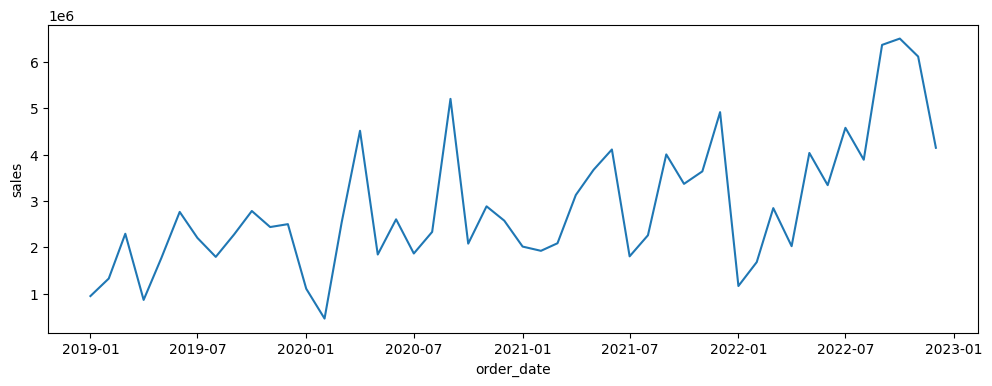

In [19]:
sns.lineplot(data=df_aux, x='order_date', y='sales');

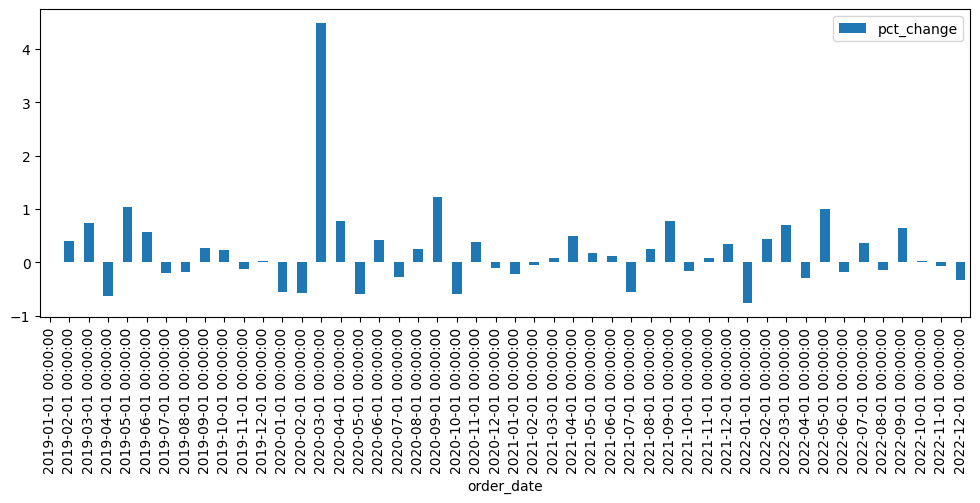

In [20]:
df_aux.plot.bar(y='pct_change');

In [21]:
# Média de Porcentagem/Rentabilidade não é o calculo correto 
# (df_aux#.loc['2020-06-01':] # 2020-03 outlier
#      [['pct_change']].describe().T
# )

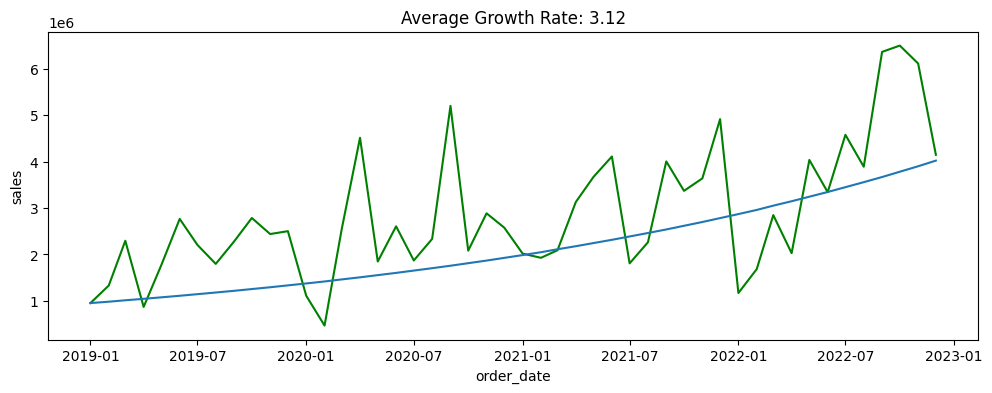

In [22]:
avg_growth_rate = pow(4146944.0/949192.0, 1/48) #-1

df_growth_rate = df_aux[['sales']]

for i in range(len(df_growth_rate)-1):
    df_growth_rate.iloc[i+1]['sales'] = df_growth_rate.iloc[i]['sales'] * avg_growth_rate
    
plt.title(f"Average Growth Rate: {round((avg_growth_rate-1)*100, 2)}")
sns.lineplot(data=df_aux, x='order_date', y='sales', c='g')
sns.lineplot(data=df_growth_rate, x='order_date', y='sales');

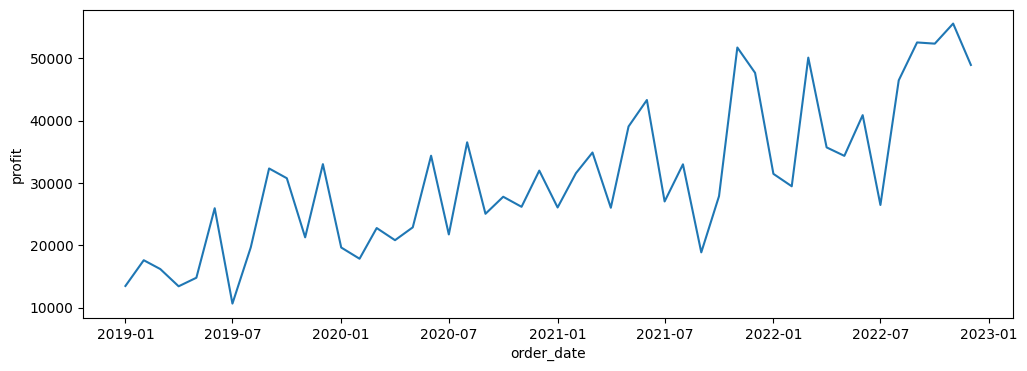

In [23]:
sns.lineplot(data=df_aux, x='order_date', y='profit');

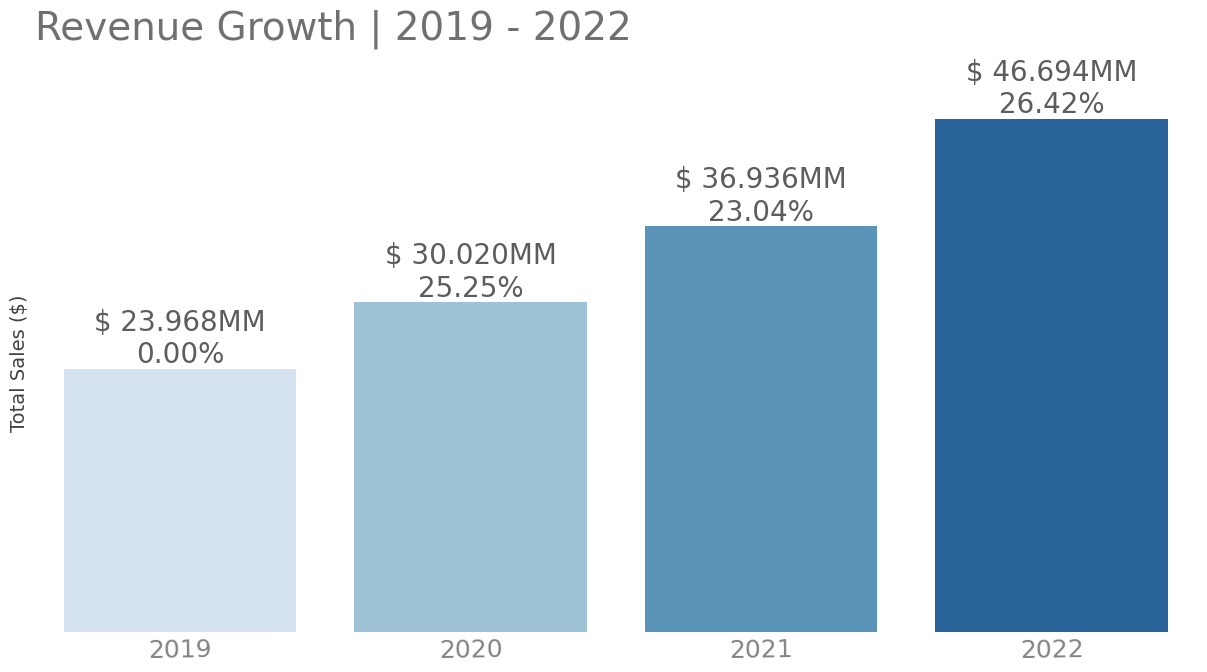

In [24]:
# presentation

df_aux = (df_orders_abt.groupby(
                df_orders_abt['order_date'].dt.to_period("Y"))
                [['sales', 'profit']].sum()
).reset_index()

df_aux['pct_change'] = df_aux['sales'].pct_change().fillna(0)


fig(15, 7)
plt.title(f"Revenue Growth | 2019 - 2022\n", fontsize=28, color='#707070', loc='left')
sns.barplot(data=df_aux, x='order_date', y='sales',  palette='Blues')

plt.box(False)
plt.tick_params(axis='both', which='both', length=0)
plt.xlabel(None)
plt.ylabel("Total Sales ($)", size=14, color='#424242')
plt.xticks(color="#838383", rotation=.9, size=18)
plt.yticks([],[])

x = list(range(len(df_aux)))
growth_rate = df_aux['pct_change'].values
sales = df_aux['sales'].values
for sale_value, rate in zip(range(len(sales)), growth_rate):
    plt.annotate("$ {:,.3f}MM\n{:,.2f}%".format(sales[sale_value]/1000000, growth_rate[sale_value]*100),
                 xy=(x[sale_value],sales[sale_value]),
                 ha='center', va='bottom', size=20, color='#5d5d5d') #color='#03396c'

### How many orders do we receive each month?

    Increasing number of orders.

In [25]:
df_aux = (df_orders_abt.groupby(
                df_orders_abt['order_date'].dt.to_period("M").dt.to_timestamp())
                [['order_id']].nunique()
)

df_aux['pct_change'] = df_aux['order_id'].pct_change()

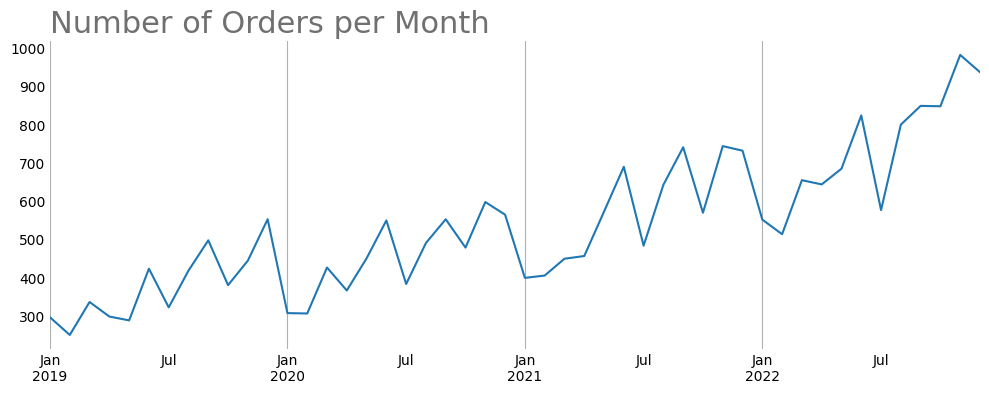

In [26]:
# presentation

plt.title(f"Number of Orders per Month", fontsize=22, color='#707070', loc='left')
df_aux['order_id'].plot()
plt.box(False)
plt.grid(axis='x')
plt.tick_params(axis='both', which='both', length=0);

plt.xlabel(None);

In [27]:
(df_aux
     [['pct_change']].describe().T
)

,count,mean,std,min,25%,50%,75%,max
pct_change,47.0,0.050233,0.225598,-0.443038,-0.123288,0.06125,0.23579,0.467128


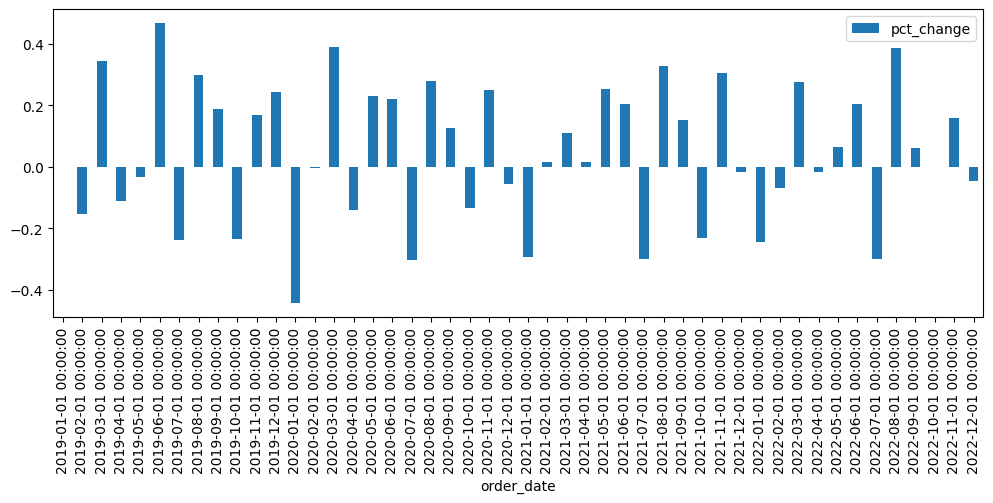

In [28]:
df_aux.plot.bar(y='pct_change');

**Increasing Revenue, but stable number of orders. Mean Order Value in 2020-03 was high, but average profit wasn't as great as average sales**

In [29]:
df_aux = (df_orders_abt.groupby(
                df_orders_abt['order_date'].dt.to_period("M").dt.to_timestamp())
                [['sales', 'profit']].mean()
)

df_aux['pct_change'] = df_aux['sales'].pct_change()

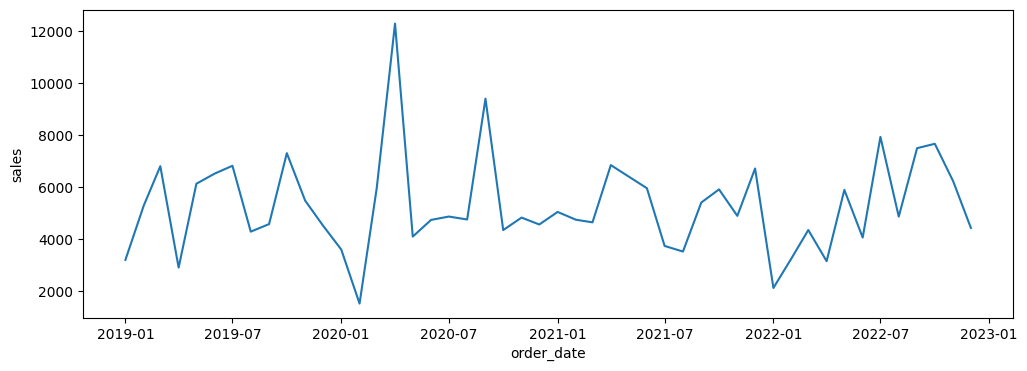

In [30]:
sns.lineplot(data=df_aux, x='order_date', y='sales');

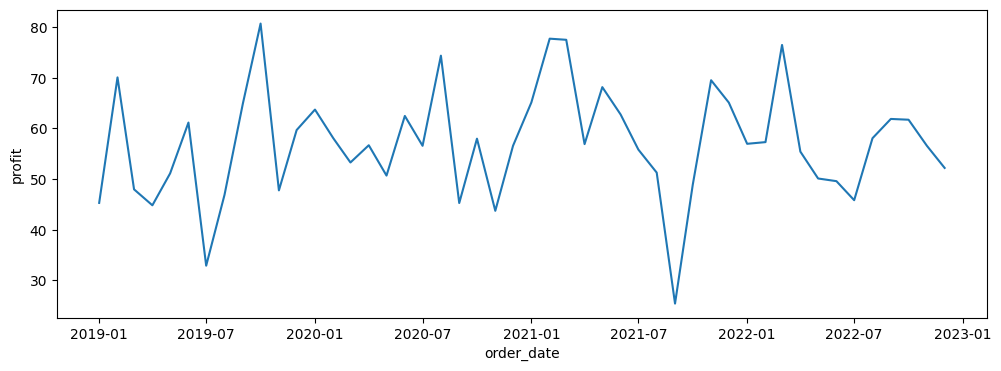

In [31]:
sns.lineplot(data=df_aux, x='order_date', y='profit');

### Has the conversion rate been increasing in recent years?

_Conversion rate measures the number of users who converted as a percentage of the total number of users that visited your site._

Since, We don't have data on number of visits, clicks or acesses on E-Mart's sales plataform We can't answer this question.

### What is our repurchase rate and how many new customers have we received?

Th quantity of New Customers is decreasing month by month (since sales are increasing our repurchase rate must be growing)

In [32]:
df_orders_abt['customer_id'].duplicated().sum()

24163

In [33]:
df_aux = (df_orders_abt.sort_values(['customer_id', 'order_date'])
                       .drop_duplicates(subset=['customer_id'], keep='first')
         
)

df_aux = (df_aux.groupby(
                df_orders_abt['order_date'].dt.to_period("M"))
                .agg(new_customers=('customer_id', 'count'))
)

df_aux['pct_change'] = df_aux['new_customers'].pct_change()

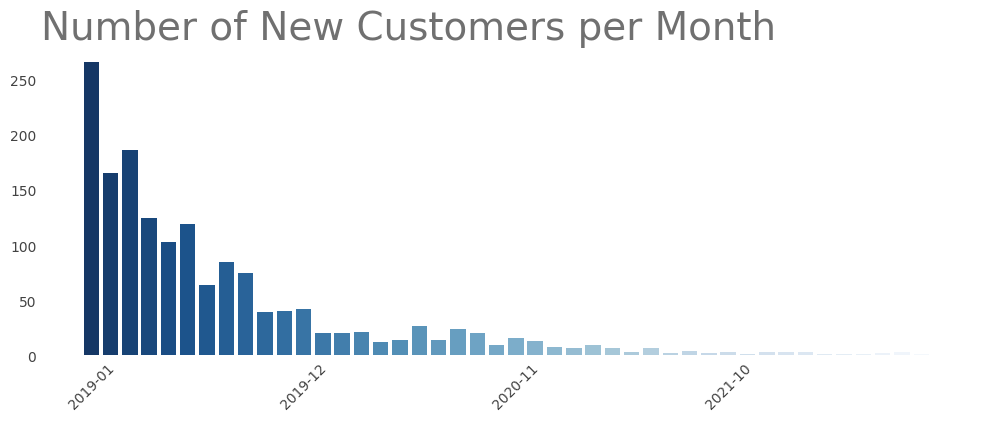

In [34]:
# presentation
plt.box(False)
sns.barplot(data=df_aux, x=df_aux.index, y='new_customers', palette="Blues_r")
plt.title(f"Number of New Customers per Month", fontsize=28, color='#707070', loc='left')
plt.tick_params(axis='both', which='both', length=0)
plt.xticks(rotation=45, color='#424242')
plt.yticks(color='#424242')
plt.xlabel("")
plt.ylabel("") #plt.ylabel("Quantity of New Customers", color='#424242', size=14)
plt.locator_params(axis='x', nbins=4);

In [35]:
(df_aux['new_customers']/ df_aux['new_customers'].sum()*100).head(6)#.sum() # 60.62%

order_date
2019-01    16.729560
2019-02    10.377358
2019-03    11.698113
2019-04     7.861635
2019-05     6.477987
2019-06     7.484277
Freq: M, Name: new_customers, dtype: float64

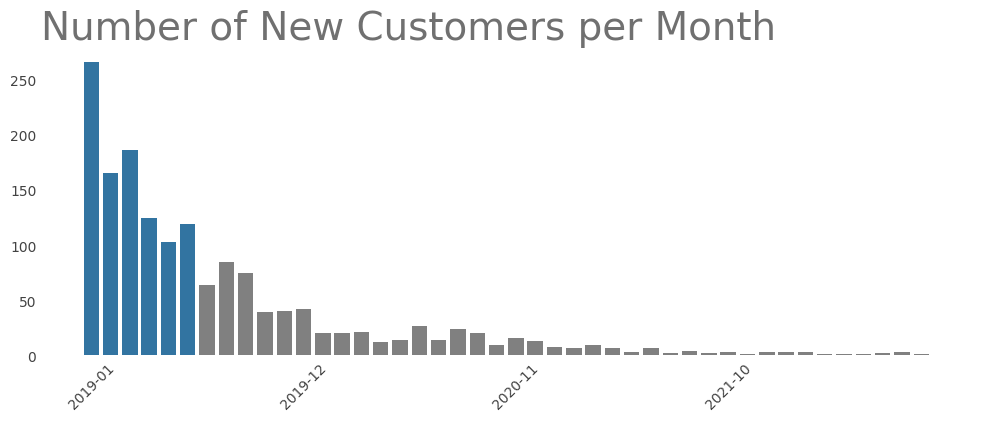

In [36]:
# presentation
blue = '#1f77b4'; colors = []
for i in range(6): colors.append(blue)
for i in range(12*4-6): colors.append('grey')

plt.box(False)
sns.barplot(data=df_aux, x=df_aux.index, y='new_customers', palette=colors)
plt.title(f"Number of New Customers per Month", fontsize=28, color='#707070', loc='left')
plt.tick_params(axis='both', which='both', length=0)
plt.xticks(rotation=45, color='#424242')
plt.yticks(color='#424242')
plt.xlabel("")
plt.ylabel("") #plt.ylabel("Quantity of New Customers", color='#424242', size=14)
plt.locator_params(axis='x', nbins=4);

In [37]:
df_new_customers = df_aux[['new_customers']].reset_index()
df_new_customers['order_date'] = df_new_customers['order_date'].dt.to_timestamp()

### Repurchase Rate 


- Number of customers who have purchased more than once by the total number of customers over the same time period



**20% of Monthly Sales are repurchases. In a 90 days windows (to_period("Q")) It's an average of 47% Repurchase Rate.**

In [38]:
df_aux = (df_orders_abt.groupby(
                [df_orders_abt['order_date'].dt.to_period("M").dt.to_timestamp(), 'customer_id'])
                .agg(number_of_orders=('order_id', 'nunique'))
).reset_index()

df_aux = (pd.concat([df_aux.query("number_of_orders > 1").groupby('order_date')
                             .agg(repurchase_customers=('customer_id', 'count')),
                     df_aux.groupby('order_date')
                             .agg(customer_quantity=('customer_id', 'count'))],
                    axis=1)

)
df_aux['repurchase_rate'] = df_aux['repurchase_customers'] / df_aux['customer_quantity']

In [39]:
df_aux[['repurchase_rate']].describe().T

,count,mean,std,min,25%,50%,75%,max
repurchase_rate,48.0,0.206074,0.062046,0.105455,0.159106,0.198889,0.251395,0.357035


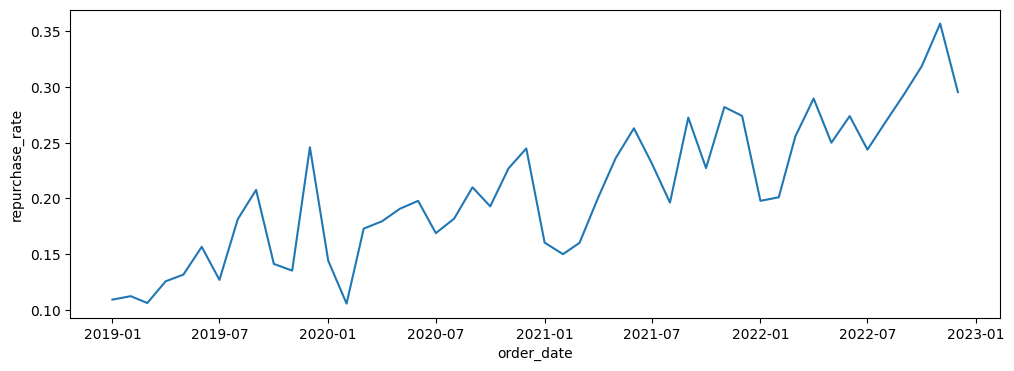

In [40]:
sns.lineplot(data=df_aux, x='order_date', y='repurchase_rate');

In [41]:
df_aux = df_aux.merge(df_new_customers, on='order_date')
df_aux['repurchase_rate'] = round((df_aux['repurchase_rate']*100), 2)

In [42]:
df_aux['order_date'] = df_aux['order_date'].dt.to_period("M")

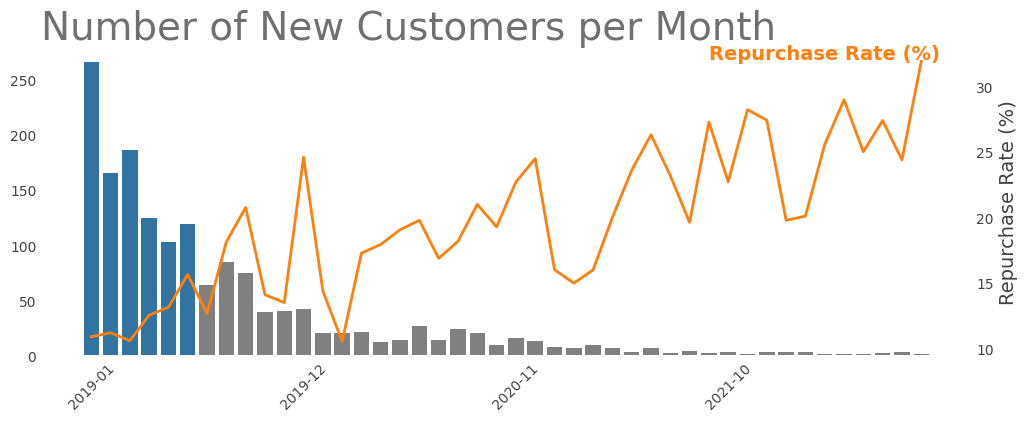

In [43]:
# presentation
blue = '#1f77b4'; colors = []
for i in range(6): colors.append(blue)
for i in range(12*4-6): colors.append('grey')

plt.box(False)
sns.barplot(data=df_aux, x='order_date', y='new_customers', palette=colors)
plt.title(f"Number of New Customers per Month", fontsize=28, color='#707070', loc='left')
plt.tick_params(axis='both', which='both', length=0)
plt.xticks(rotation=45, color='#424242')
plt.yticks(color='#424242')
plt.xlabel("")
plt.ylabel("") #plt.ylabel("Quantity of New Customers", color='#424242', size=14)
plt.locator_params(axis='x', nbins=4);

ax2 = plt.twinx()
plt.box(False)
sns.lineplot(data=df_aux['repurchase_rate'], ax=ax2, linewidth=2, color="#ff7f0e")
plt.tick_params(axis='both', which='both', length=0)
plt.yticks(color='#424242')
plt.ylabel("Repurchase Rate (%)", color='#424242', size=14)
plt.text(32, 32.1, "Repurchase Rate (%)", color="#ff7f0e", size=14, weight='bold');

### How often do our customers make a purchase and what is the average amount spent on each purchase?


Average Order Value is 5290 while average order profit is 57. 

The average number of orders per customer is 1.25 (in a 90 days windows it's 1.8)

In [44]:
df_aux = (df_orders_abt.groupby(
                df_orders_abt['order_date'].dt.to_period("M").dt.to_timestamp())
               [['sales', 'profit']].mean()
)
df_aux.columns = ['avg_sales', 'avg_profit']

In [45]:
df_aux.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_sales,48.0,5291.420643,1871.793854,1510.662970,4327.651712,4862.829148,6272.510875,12299.830554
avg_profit,48.0,57.068237,11.111115,25.438719,49.993309,56.798530,62.995315,80.696960


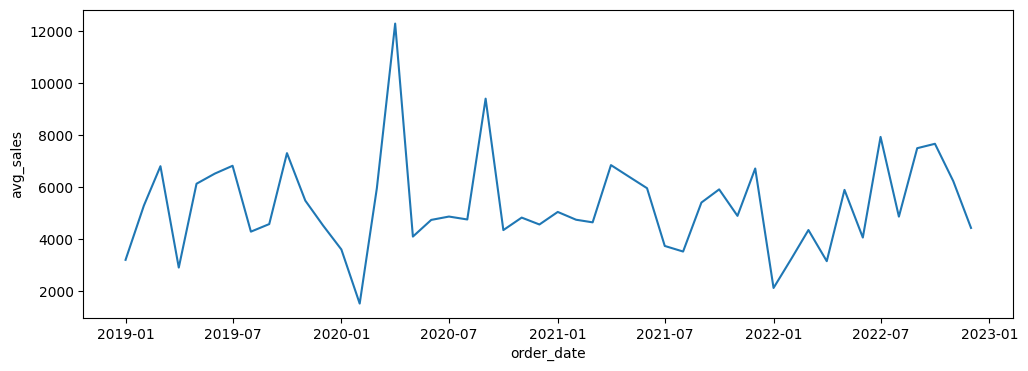

In [46]:
sns.lineplot(data=df_aux, x='order_date', y='avg_sales');

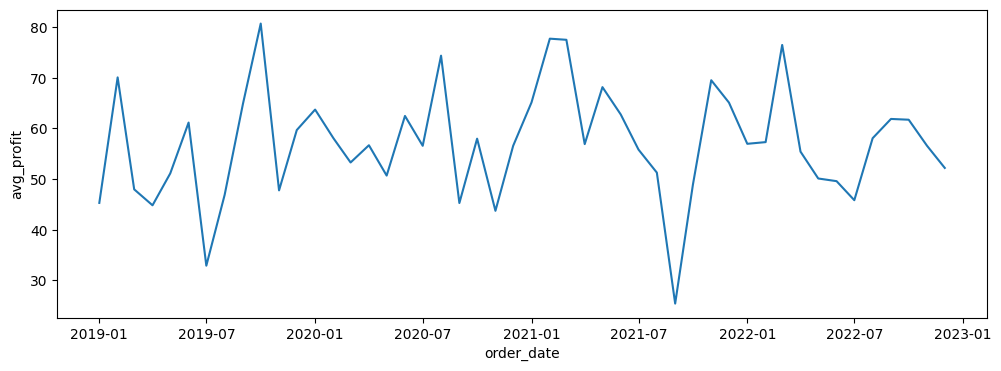

In [47]:
sns.lineplot(data=df_aux, x='order_date', y='avg_profit');

## Customer purchase Frequency

In [48]:
df_aux = (df_orders_abt.groupby(
                df_orders_abt['order_date'].dt.to_period("Q").dt.to_timestamp())
              .agg(order_quantity=('order_id', 'count'), distinct_customers=('customer_id', 'nunique'))
)
df_aux['purchase_frequency'] = df_aux['order_quantity'] / df_aux['distinct_customers']

In [49]:
df_aux.describe().T

,count,mean,std,min,25%,50%,75%,max
order_quantity,16.0,1609.5625,510.436019,885.00000,1252.000000,1535.00000,1912.500000,2767.000000
distinct_customers,16.0,871.6875,146.122651,617.00000,789.250000,865.00000,980.750000,1128.000000
purchase_frequency,16.0,1.8052,0.273012,1.43436,1.612357,1.75972,1.949302,2.453014


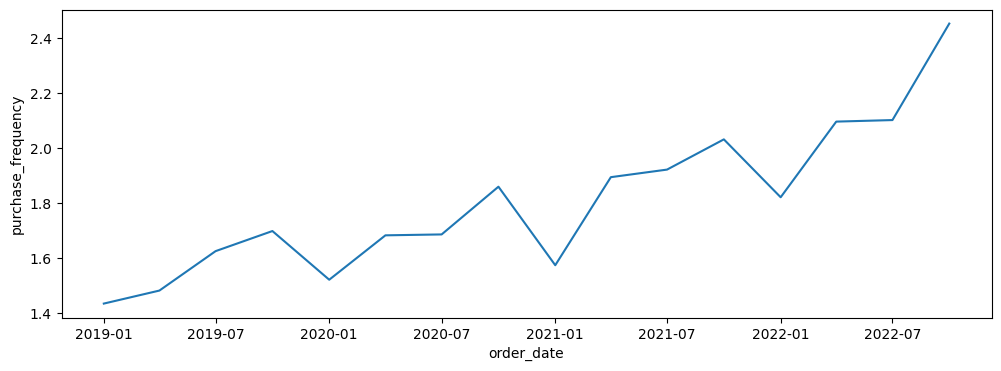

In [50]:
sns.lineplot(data=df_aux, x='order_date', y='purchase_frequency');

### What is our current churn rate (customers who haven't purchased for more than 90 days)?


29%

In [73]:
df_aux = (df_orders_abt.groupby("customer_id")
              .agg(last_purchase_date=('order_date', 'max'))
              .reset_index()
)
df_aux['days_last_purchase'] = (df_orders_abt['order_date'].max() - df_aux['last_purchase_date']).dt.days
df_aux['is_churn'] = df_aux['days_last_purchase'].apply(lambda x: True if x>90 else False)

In [79]:
df_aux[['is_churn']].mean()

is_churn    0.291824
dtype: float64

In [80]:
df_aux[['days_last_purchase']].describe().T

,count,mean,std,min,25%,50%,75%,max
days_last_purchase,1590.0,87.616981,127.879879,0.0,14.0,40.0,103.0,1118.0


In [81]:
df_aux.to_csv("../../data/growth_analysis/customer_in_churn.csv")

## Hypothesis Answers

- **In the [Macro View](#How-is-the-revenue-growth-and-what's-the-growth-rate?) there'is Increasing Revenue, but stable increase in number of orders. However in 2020-03 there was a great rise in sales.  Mean Order Value was high, but average profit wasn't as great as average sales. Why? Can We reproduce what happened that month?**


_Most of Analysis was made in Power Bi_

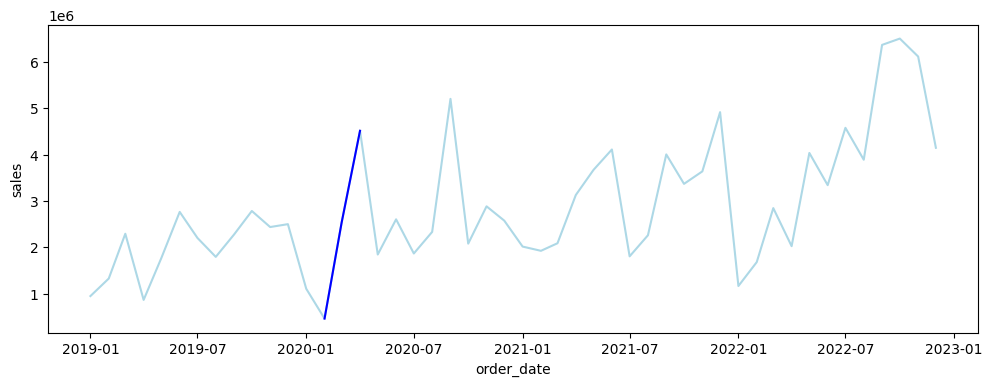

In [54]:
df_aux = (df_orders_abt.groupby(
                df_orders_abt['order_date'].dt.to_period("M").dt.to_timestamp())
                [['sales', 'profit']].sum()
)

df_aux['pct_change'] = df_aux['sales'].pct_change()

sns.lineplot(data=df_aux, x='order_date', y='sales', c='lightblue');
sns.lineplot(data=df_aux[df_aux.reset_index()['order_date'].between('2020-02-01', '2020-04-01').tolist()],
             x='order_date', y='sales', c='blue');

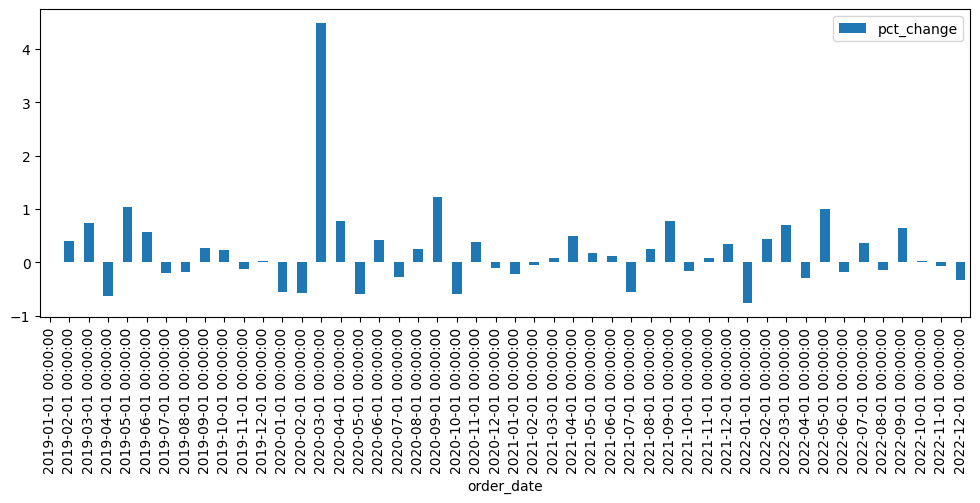

In [55]:
df_aux.plot.bar(y='pct_change');

**South Region Sales highly increased while others don't** (their sales got better but only a month later)

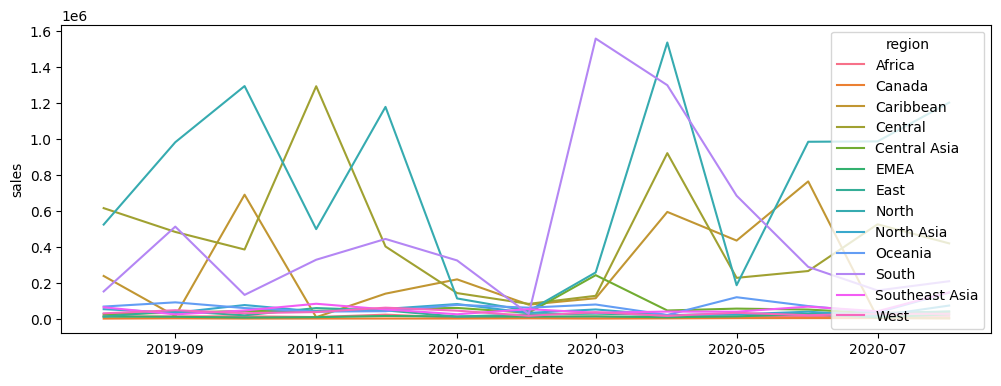

In [56]:
df_aux = (df_orders_abt.groupby([
                df_orders_abt['order_date'].dt.to_period("M").dt.to_timestamp(),
                'region'])
                [['sales']].sum()
)

sns.lineplot(data=df_aux.loc['2019-08-01':'2020-08-01'], x='order_date', y='sales', hue='region');

**Being more specific Market from LATAM**

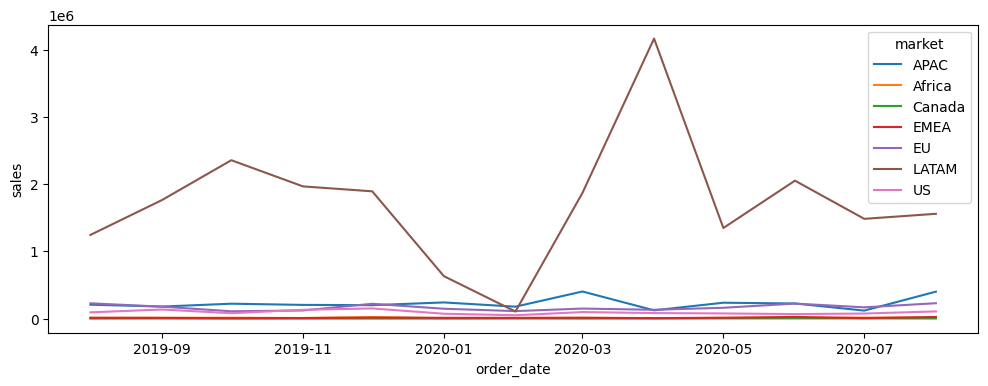

In [57]:
df_aux = (df_orders_abt.groupby([
                df_orders_abt['order_date'].dt.to_period("M").dt.to_timestamp(),
                'market'])
                [['sales']].sum()
)

sns.lineplot(data=df_aux.loc['2019-08-01':'2020-08-01'], x='order_date', y='sales', hue='market');

**LATAM South... It has 59% of sales value that month**

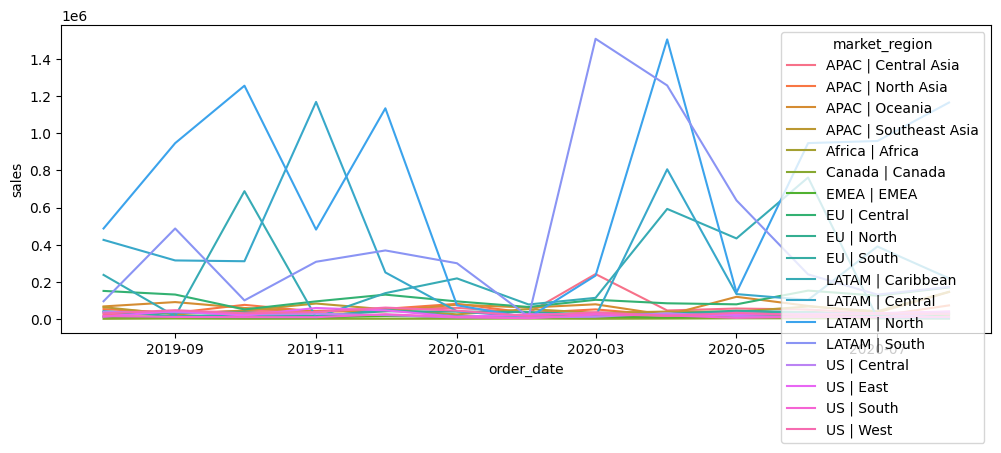

In [58]:
df_aux = (df_orders_abt.groupby([
                df_orders_abt['order_date'].dt.to_period("M").dt.to_timestamp(),
                'market_region'])
                [['sales']].sum()
)
sns.lineplot(data=df_aux.loc['2019-08-01':'2020-08-01'], x='order_date', y='sales', hue='market_region');

In [59]:
df_aux = df_aux.loc['2020-03-01'].sort_values('sales', ascending=False).round()
df_aux['percentage'] = df_aux / df_aux.sum()
df_aux

,sales,percentage
market_region,,
LATAM | South,1510061.0,0.594250
APAC | Central Asia,241315.0,0.094964
LATAM | North,233029.0,0.091703
LATAM | Caribbean,113113.0,0.044513
EU | Central,102559.0,0.040360
APAC | Oceania,78239.0,0.030789
APAC | North Asia,50740.0,0.019968
US | West,35617.0,0.014016
APAC | Southeast Asia,32474.0,0.012779


**Technology Products were the reason**

<p align="center">
  <img src="../img/South Latam Sales Profit by Category.PNG" width="800" />
</p>

**Copiers, but that was a increase in Sales not in Profit**

<p align="center">
  <img src="../img/South Latam Sales Profit by Tech Product.PNG" width="800" />
</p>